# Fake Healthcare Explatory Data Analysis
A while back, I wanted to demonstrate a statistical analysis on a population health dataset. Because a typical pop. health dataset has PHI, I had a very tough time finding any open-source. Instead of continuing to look, I generated my own data that has known characteristics and relationships from a typical population health dataset. This is an exploratory analysis on that data.

In [23]:
# Loading initial libraries
library(tidyverse)
library(RCurl)
library(gridExtra)
library(PerformanceAnalytics)

Reading in the data from my GitHub

In [13]:
url <- getURL("https://raw.githubusercontent.com/JonWayland/Fake-Healthcare/master/HP-Universal_DF.csv")
data <- read.csv(text = url)

In [11]:
head(data)

X,PatientID,Age,CC_Count,Risk_Count,HP_Paid,Gender,ER_Count,CC_Arthritis,CC_Asthma,...,CC_Hyperlipidemia,CC_Hypertension,CC_Ischemic_Heart_Disease,CC_Kidney_Disease,CC_Osteoporosis,CC_Schizophrenia,CC_Stroke,ER_Copay,PCP_Copay,IP_Visits
1,L7236961,31.35640,0,3,10057.40,female,0,0,0,...,0,0,0,0,0,0,0,$100,$35,0
3,H8018589,39.23324,2,2,15212.04,female,1,0,0,...,0,0,0,0,0,0,0,$150,$50,6
5,B7343446,50.81442,2,7,20518.37,female,0,0,0,...,1,1,0,0,0,0,0,$75,$20,1
6,E7283953,34.06897,2,2,15224.01,male,0,0,0,...,0,0,1,0,0,0,1,$150,$50,0
11,A2494289,36.50375,2,1,24322.15,male,1,0,1,...,0,0,0,0,0,0,0,$75,$20,1
15,Y3199084,30.99372,1,1,5074.47,male,0,0,0,...,0,1,0,0,0,0,0,$100,$35,1


In [15]:
summary(data)

       X            PatientID          Age           CC_Count     
 Min.   :    1   A0013127:    1   Min.   :16.00   Min.   : 0.000  
 1st Qu.: 3751   A0019906:    1   1st Qu.:23.91   1st Qu.: 0.000  
 Median : 7500   A0030910:    1   Median :29.57   Median : 0.000  
 Mean   : 7500   A0053393:    1   Mean   :32.59   Mean   : 0.588  
 3rd Qu.:11250   A0056860:    1   3rd Qu.:38.12   3rd Qu.: 1.000  
 Max.   :15000   A0061855:    1   Max.   :77.67   Max.   :18.000  
                 (Other) :14994                                   
   Risk_Count       HP_Paid            Gender        ER_Count    
 Min.   :0.000   Min.   :    97.3   female:7354   Min.   :0.000  
 1st Qu.:1.000   1st Qu.:  4608.9   male  :7646   1st Qu.:0.000  
 Median :1.000   Median :  9328.6                 Median :0.000  
 Mean   :1.855   Mean   : 16410.3                 Mean   :1.086  
 3rd Qu.:2.000   3rd Qu.: 18928.7                 3rd Qu.:2.000  
 Max.   :7.000   Max.   :500000.0                 Max.   :9.000  
  

In [73]:
str(data)

'data.frame':	15000 obs. of  30 variables:
 $ X                        : int  1 3 5 6 11 15 16 17 18 20 ...
 $ PatientID                : Factor w/ 15000 levels "A0013127","A0019906",..: 6864 4546 1019 2698 146 14071 958 6520 10913 3987 ...
 $ Age                      : num  31.4 39.2 50.8 34.1 36.5 ...
 $ CC_Count                 : int  0 2 2 2 2 1 1 1 1 0 ...
 $ Risk_Count               : int  3 2 7 2 1 1 1 4 1 3 ...
 $ HP_Paid                  : num  10057 15212 20518 15224 24322 ...
 $ Gender                   : Factor w/ 2 levels "female","male": 1 1 1 2 2 2 2 1 1 2 ...
 $ ER_Count                 : int  0 1 0 0 1 0 0 0 0 0 ...
 $ CC_Arthritis             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CC_Asthma                : int  0 0 0 0 1 0 0 0 0 0 ...
 $ CC_Atrial_Fibrillation   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CC_Austism               : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CC_Cancer                : int  0 1 0 0 0 0 0 0 0 0 ...
 $ CC_COPD                  : int  0 0 0 0 1 0 0 0 0 0 ...
 $ CC

## Visualizations

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


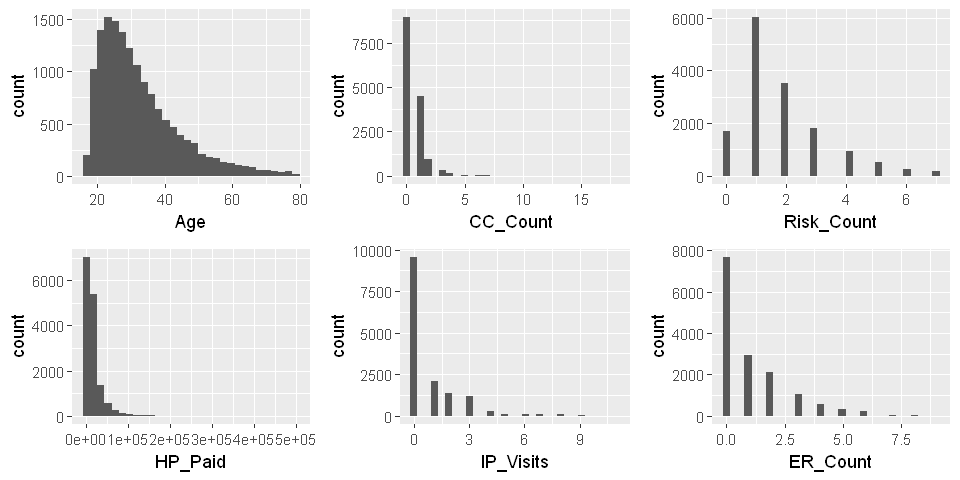

In [56]:
options(repr.plot.width = 8, repr.plot.height = 4)

p1<-data %>% 
    ggplot(aes(x=Age)) +
    geom_histogram()

p2<-data %>% 
    ggplot(aes(x=CC_Count)) +
    geom_histogram()

p3<-data %>% 
    ggplot(aes(x=Risk_Count)) +
    geom_histogram()

p4<-data %>% 
    ggplot(aes(x=HP_Paid)) +
    geom_histogram()

p5<-data %>% 
    ggplot(aes(x=IP_Visits)) +
    geom_histogram()

p6<-data %>% 
    ggplot(aes(x=ER_Count)) +
    geom_histogram()

grid.arrange(p1,p2,p3,p4,p5,p6, ncol =3)

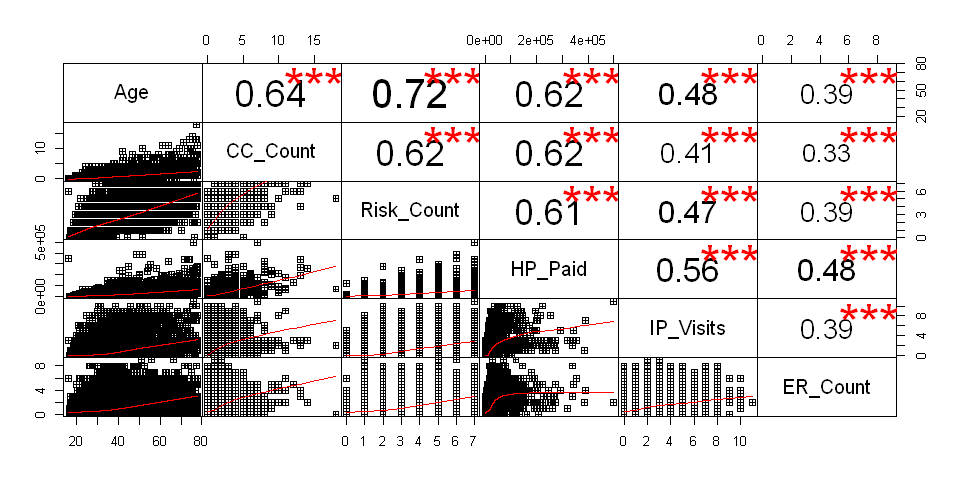

In [59]:
corDat <- data %>% select(Age, CC_Count, Risk_Count, HP_Paid, IP_Visits, ER_Count)
chart.Correlation(corDat, histogram=FALSE, pch=12)

## Chronic Conditions Prevalence

In [40]:
max(chisq.test(data$CC_Atrial_Fibrillation, data$CC_Austism)$statistic)
chisq.test(data$CC_Atrial_Fibrillation, data$CC_Austism)$p.value

[1] 0.5304885

[1] 0.4664016

In [37]:
conditions<-data[, grepl("CC_",names(data))]
conditions<-conditions[,-1]
head(conditions)

CC_Arthritis,CC_Asthma,CC_Atrial_Fibrillation,CC_Austism,CC_Cancer,CC_COPD,CC_Dementia,CC_Depression,CC_Diabetes,CC_Heart_Failure,CC_Hepatitis,CC_HIV_AIDS,CC_Hyperlipidemia,CC_Hypertension,CC_Ischemic_Heart_Disease,CC_Kidney_Disease,CC_Osteoporosis,CC_Schizophrenia,CC_Stroke
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [45]:
options(warn=-1) # Shutting off warnings for chisq.test()

prevalence<-data.frame(ConditionOne = character(), 
                       ConditionTwo = character(), 
                       ChisqStat = numeric(), 
                       pValue = numeric())

for(i in 1:ncol(conditions)){
    for(j in 2:ncol(conditions)){
        if(i!=j & i>j){
            prevalence <- rbind(prevalence, data.frame(
                ConditionOne = names(conditions)[i],
                ConditionTwo = names(conditions)[j],
                ChisqStat = max(chisq.test(conditions[,i], conditions[,j])$statistic),
                ChisqStat = chisq.test(conditions[,i], conditions[,j])$p.value
            ))
        }
    }
}

In [47]:
# Top 5 most prevalent comorbidities
prevalence %>% arrange(desc(ChisqStat)) %>% head

ConditionOne,ConditionTwo,ChisqStat,ChisqStat.1
CC_COPD,CC_Asthma,3254.7871,0.000000e+00
CC_Hypertension,CC_Hyperlipidemia,2039.5152,0.000000e+00
CC_Stroke,CC_Heart_Failure,1914.8526,0.000000e+00
CC_Ischemic_Heart_Disease,CC_Heart_Failure,749.5463,5.035504e-165
CC_Heart_Failure,CC_Atrial_Fibrillation,684.5267,6.926902e-151
CC_Kidney_Disease,CC_Diabetes,549.2420,1.840271e-121


In [52]:
table(conditions[,"CC_COPD"], conditions[,"CC_Asthma"])

   
        0     1
  0 13801   520
  1   291   388

In [53]:
table(conditions[,"CC_Hypertension"], conditions[,"CC_Hyperlipidemia"])

   
        0     1
  0 13752   444
  1   490   314

In [54]:
table(conditions[,"CC_Stroke"], conditions[,"CC_Heart_Failure"])

   
        0     1
  0 14077   407
  1   299   217

## Exploring ER Copay and PCP Copay

In [77]:
data$ER_Copay <- factor(data$ER_Copay, levels = c("$25","$75","$100","$150"))
data$PCP_Copay <- factor(data$PCP_Copay, levels = c("$20","$25","$35","$50"))

In [120]:
# Plotting Function
catVarSumm<-function(data, catVar){
    data %>% 
    group_by_(catVar) %>%
    summarise(Mean_Age = mean(Age),
             Mean_ER_Count = mean(ER_Count),
             Mean_CC_Count = mean(CC_Count),
             Mean_Risk_Count = mean(Risk_Count),
             Mean_HP_Paid = mean(HP_Paid),
             Mean_IP_Visits = mean(IP_Visits)) %>% data.frame 
}

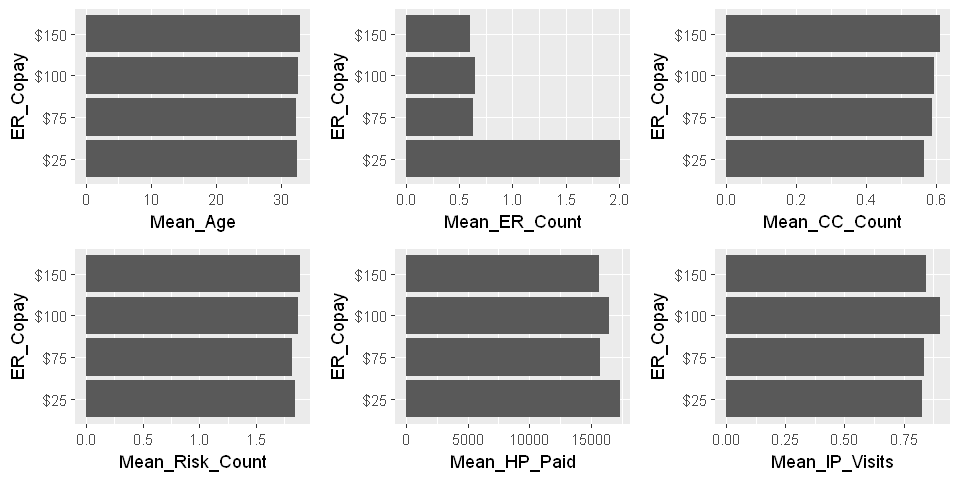

In [121]:
p1<-catVarSumm(data=data, catVar="ER_Copay") %>%
    ggplot(aes(x = ER_Copay, y = Mean_Age)) +
    geom_bar(stat="identity") + coord_flip()

p2<-catVarSumm(data=data, catVar="ER_Copay") %>%
    ggplot(aes(x = ER_Copay, y = Mean_ER_Count)) +
    geom_bar(stat="identity") + coord_flip()

p3<-catVarSumm(data=data, catVar="ER_Copay") %>%
    ggplot(aes(x = ER_Copay, y = Mean_CC_Count)) +
    geom_bar(stat="identity") + coord_flip()

p4<-catVarSumm(data=data, catVar="ER_Copay") %>%
    ggplot(aes(x = ER_Copay, y = Mean_Risk_Count)) +
    geom_bar(stat="identity") + coord_flip()

p5<-catVarSumm(data=data, catVar="ER_Copay") %>%
    ggplot(aes(x = ER_Copay, y = Mean_HP_Paid)) +
    geom_bar(stat="identity") + coord_flip()

p6<-catVarSumm(data=data, catVar="ER_Copay") %>%
    ggplot(aes(x = ER_Copay, y = Mean_IP_Visits)) +
    geom_bar(stat="identity") + coord_flip()


grid.arrange(p1,p2,p3,p4,p5,p6,ncol=3)

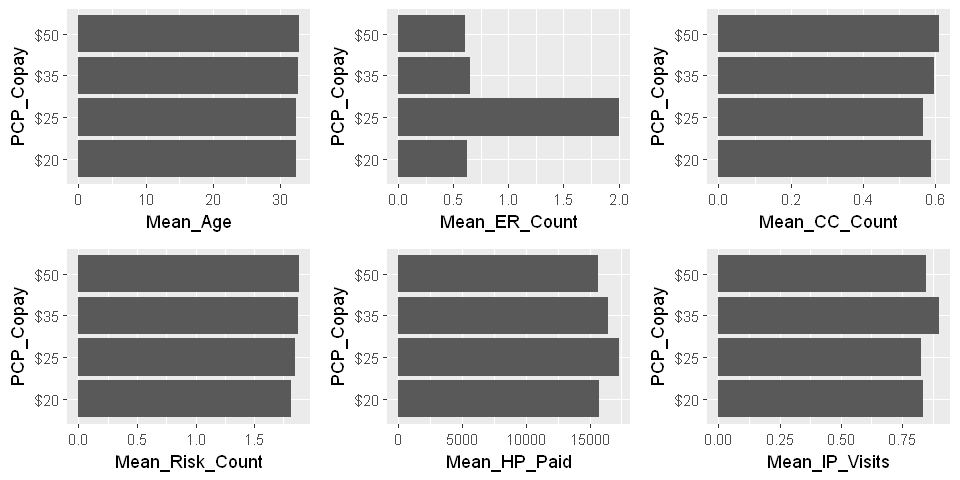

In [122]:
p1<-catVarSumm(data=data, catVar="PCP_Copay") %>%
    ggplot(aes(x = PCP_Copay, y = Mean_Age)) +
    geom_bar(stat="identity") + coord_flip()

p2<-catVarSumm(data=data, catVar="PCP_Copay") %>%
    ggplot(aes(x = PCP_Copay, y = Mean_ER_Count)) +
    geom_bar(stat="identity") + coord_flip()

p3<-catVarSumm(data=data, catVar="PCP_Copay") %>%
    ggplot(aes(x = PCP_Copay, y = Mean_CC_Count)) +
    geom_bar(stat="identity") + coord_flip()

p4<-catVarSumm(data=data, catVar="PCP_Copay") %>%
    ggplot(aes(x = PCP_Copay, y = Mean_Risk_Count)) +
    geom_bar(stat="identity") + coord_flip()

p5<-catVarSumm(data=data, catVar="PCP_Copay") %>%
    ggplot(aes(x = PCP_Copay, y = Mean_HP_Paid)) +
    geom_bar(stat="identity") + coord_flip()

p6<-catVarSumm(data=data, catVar="PCP_Copay") %>%
    ggplot(aes(x = PCP_Copay, y = Mean_IP_Visits)) +
    geom_bar(stat="identity") + coord_flip()


grid.arrange(p1,p2,p3,p4,p5,p6,ncol=3)